<a href="https://colab.research.google.com/github/Pushpal-Tayal/Playstore_review_analyser/blob/main/playstore_reviews_scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Needed:
####-google-play-scraper
####-pandas
####-numpy

In [ ]:
#if u haven't install the google-play scrapper library u can install it by this code:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.7 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=d37ccac9f1029c80fb35ee93622587d771f0f232a6b35ff145831119e8a435b5
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


In [ ]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud

## Scraping Code
-Either scrape all reviews or take a subset

###Scrape all reviews (Option 1)

In [ ]:
result = reviews_all(
    'com.healthians.main.healthians',
    sleep_milliseconds=0, # defaults to 0
    lang='en',            # defaults to 'en'
    country='in',         # defaults to 'us'
    sort=Sort.NEWEST,     # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

###Scrape desired count reviews (Option 2)

In [ ]:
# result, continuation_token = reviews(
#     'com.lybrate.phoenix',
#     lang='en',                # defaults to 'en'
#     country='in',             # defaults to 'us'
#     sort=Sort.NEWEST,  # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
#     count=5000,               # defaults to 100
#     filter_score_with= 1 or 2    # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
# )

##Scraping Result

### Preview scrapped Data


In [ ]:
scrapeddata = pd.DataFrame(np.array(result),columns=['review'])

scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1b57c943-45b1-4c95-afcd-070655c14e40,Shivendra Dhiman,https://play-lh.googleusercontent.com/a-/AOh14...,Professional service.. on time reports .,5,0,16.0,2022-06-22 18:32:13,None,NaT
1,f1fb03ee-181d-42e9-b5fb-f106fab2f5f2,jewel shukla,https://play-lh.googleusercontent.com/a/AATXAJ...,Worst service A idiot person come for sample c...,1,0,16.0,2022-06-22 18:29:43,None,NaT
2,3f9cfdec-943f-46c1-9af9-7ba1e502f0fb,Krinal Chakraborty,https://play-lh.googleusercontent.com/a-/AOh14...,"Not good, yes it is cheap than other vendors, ...",2,0,16.0,2022-06-22 17:24:14,None,NaT
3,01a2f475-ef20-4e48-9ccc-4bf9c1196cbb,sandip singh,https://play-lh.googleusercontent.com/a/AATXAJ...,Very poor performance. Sample taken and report...,1,0,16.0,2022-06-22 15:58:57,None,NaT
4,1957993a-03fd-4db8-8340-60485acecf37,Sachin Kamate,https://play-lh.googleusercontent.com/a-/AOh14...,I liked the service utmost right from the book...,5,0,15.8,2022-06-22 12:09:44,None,NaT


###No. of reviews scrapped

In [ ]:
len(scrapeddata.index)

9712

###Filtering relevant columns from the scrapped data

In [ ]:
scrapeddata[['content','score','at']].head() 

,content,score,at
0,Professional service.. on time reports .,5,2022-06-22 18:32:13
1,Worst service A idiot person come for sample c...,1,2022-06-22 18:29:43
2,"Not good, yes it is cheap than other vendors, ...",2,2022-06-22 17:24:14
3,Very poor performance. Sample taken and report...,1,2022-06-22 15:58:57
4,I liked the service utmost right from the book...,5,2022-06-22 12:09:44


###Sorting data by Date (Newest/Oldest)

In [ ]:
scrappeddata1 = scrapeddata[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=False) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

,content,score,at
0,Professional service.. on time reports .,5,2022-06-22 18:32:13
1,Worst service A idiot person come for sample c...,1,2022-06-22 18:29:43
2,"Not good, yes it is cheap than other vendors, ...",2,2022-06-22 17:24:14
3,Very poor performance. Sample taken and report...,1,2022-06-22 15:58:57
4,I liked the service utmost right from the book...,5,2022-06-22 12:09:44


##Download scrapped data

In [ ]:
sorteddata.to_excel("1MG_full.xlsx", index = False)  #Save the file as Excel , to download: click the folder icon on the left. the csv file should be there.

In [ ]:
sorteddata.to_csv("playstorescrapping.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

#-------Further Analysis on scrapped Data-------

##Visualizing total count of scores

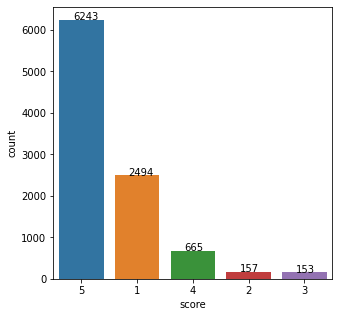

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=sorteddata["score"],  data=sorteddata, order = sorteddata["score"].value_counts().index )
for p, label in zip(ax.patches, sorteddata["score"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

Lets calculate NPS now!

In [ ]:
negative_count= sorteddata[(sorteddata.score < 3)].count()
positive_count= sorteddata[(sorteddata.score > 3)].count()
neutral_count= sorteddata[(sorteddata.score == 3)].count()
nps = (positive_count.score-negative_count.score)/(negative_count.score + neutral_count.score + positive_count.score)
nps

0.43832372322899504

####Optimizing Data- Removing reviews with less than 25 letters 
######(Reviews like "Nice App!, "Great app!" do not provide any insights and can only add to the word clutter). Adding a column for Date.

In [ ]:
sorteddata['content_length']  = sorteddata['content'].str.len()
sorteddata_modified = sorteddata[sorteddata['content_length'] > 25] #change "15" to your desired number of letters
len(sorteddata_modified.index)
sorteddata_modified['Date'] = pd.to_datetime(sorteddata_modified['at']).dt.date
sorteddata_modified.head() 
len(sorteddata_modified.index)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


6507

## Creating Wordcloud for positive and negative reviews

##Importing libraries for data cleaning and making functions
##### You may add specific stopwords as per your data requirement

In [ ]:
#importing libraries for data cleaning
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

#Making functions for removal of stopwords, lemmatizing and cleaning text:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    new_words=('reports', 'good', 'nice','experience', 'excellent', 'report', 'service', 'healthian', 'great', 'test', 'healthians', 'call')
    for i in new_words:
      stop_words.add(i)
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

#removing punctuations
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

###Segregate +ve and -ve reviews

In [ ]:
# Segregate positive and negative reviews:

mask = (sorteddata_modified["score"] == 1) | (sorteddata_modified["score"] == 2)
sorteddata_modified_rating1 = sorteddata_modified[mask]
mask1 = (sorteddata_modified["score"]==4) | (sorteddata_modified["score"]==5)
sorteddata_modified_rating2 = sorteddata_modified[mask1]
print(len(sorteddata_modified_rating1))
print(len(sorteddata_modified_rating2))
sorteddata_modified_rating1.head()

2452
3943


,content,score,at,content_length,Date
1,Worst service A idiot person come for sample c...,1,2022-06-22 18:29:43,265,2022-06-22
2,"Not good, yes it is cheap than other vendors, ...",2,2022-06-22 17:24:14,433,2022-06-22
3,Very poor performance. Sample taken and report...,1,2022-06-22 15:58:57,95,2022-06-22
11,Why there is no aushman package and no swasth ...,1,2022-06-22 08:09:14,113,2022-06-22
19,Very poor service. Local service providers are...,1,2022-06-22 06:51:43,498,2022-06-22


###Cleaning the text of stopwords, lemmatizing, and cleaning punctuations:

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
sorteddata_modified_rating1['content'] = sorteddata_modified_rating1['content'].apply(clean_text)
sorteddata_modified_rating1['content'] = sorteddata_modified_rating1['content'].apply(remove_Stopwords)
sorteddata_modified_rating1['content'] = sorteddata_modified_rating1['content'].apply(lemmatize_text)
sorteddata_modified_rating1['content'] = sorteddata_modified_rating1['content'].apply(remove_punctuation)

sorteddata_modified_rating2['content'] = sorteddata_modified_rating2['content'].apply(clean_text)
sorteddata_modified_rating2['content'] = sorteddata_modified_rating2['content'].apply(remove_Stopwords)
sorteddata_modified_rating2['content'] = sorteddata_modified_rating2['content'].apply(lemmatize_text)
sorteddata_modified_rating2['content'] = sorteddata_modified_rating2['content'].apply(remove_punctuation)

sorteddata_modified_rating1['Num_words_text'] = sorteddata_modified_rating1['content'].apply(lambda x:len(str(x).split())) 
sorteddata_modified_rating2['Num_words_text'] = sorteddata_modified_rating2['content'].apply(lambda x:len(str(x).split()))

###Wordcloud of Negative reviews

In [ ]:
sorteddata_modified_rating1.head()

,content,score,at,content_length,Date,Num_words_text
1,worst idiot person come sample collection info...,1,2022-06-22 18:29:43,265,2022-06-22,27
2,yes cheap vendor lab need accuracy cheap sever...,2,2022-06-22 17:24:14,433,2022-06-22,31
3,poor performance sample taken given even 12 hr...,1,2022-06-22 15:58:57,95,2022-06-22,10
11,aushman package swasth bharat package app revi...,1,2022-06-22 08:09:14,113,2022-06-22,12
19,poor local provider much better go get commitm...,1,2022-06-22 06:51:43,498,2022-06-22,39


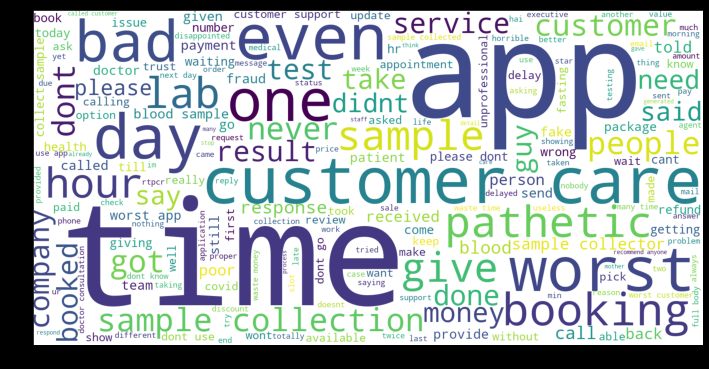

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(sorteddata_modified_rating1['content'].tolist()))
plt.figure( figsize=(12,20), facecolor='k')
plt.imshow(wordcloud)

###Wordcloud of Positive reviews

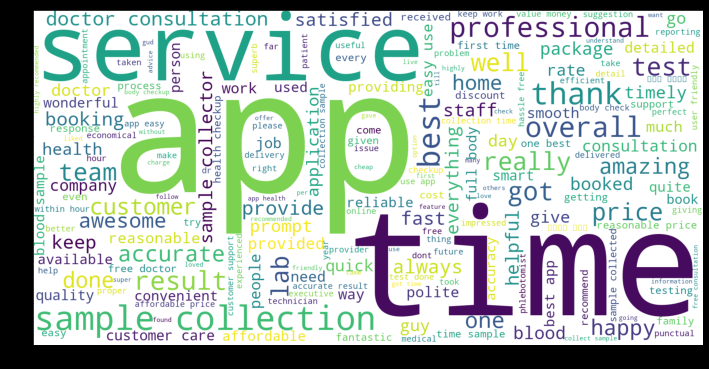

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(sorteddata_modified_rating2['content'].tolist()))
plt.figure( figsize=(12,20), facecolor='k')
plt.imshow(wordcloud)

#Identifying negative themes first:

####Creating tokenized list of all negative reviews

In [ ]:
Words_1= sorteddata_modified_rating1['content'].tolist()
String_1 = ""
for sent in Words_1:
  String_1= String_1 + sent

series_1 = String_1.split(" ")

#### Themes from Bigrams

In [ ]:
(pd.Series(nltk.ngrams(series_1, 2)).value_counts())[:40]

(customer, care)          345
(sample, collection)      206
(sample, collector)       116
(blood, sample)           111
(collect, sample)          87
(customer, support)        74
(please, dont)             71
(3, day)                   61
(full, body)               56
(next, day)                56
(24, hour)                 51
(2, day)                   48
(doctor, consultation)     48
(sample, collected)        45
(dont, use)                43
(waste, time)              42
(dont, know)               41
(4, day)                   40
(many, time)               40
(waste, money)             40
(use, app)                 39
(called, customer)         39
(multiple, time)           37
(dont, go)                 36
(dont, even)               34
(hard, copy)               33
(time, customer)           32
(one, came)                32
(app, ever)                29
(body, checkup)            29
(48, hour)                 29
(3, time)                  29
(didnt, get)               27
(body, che

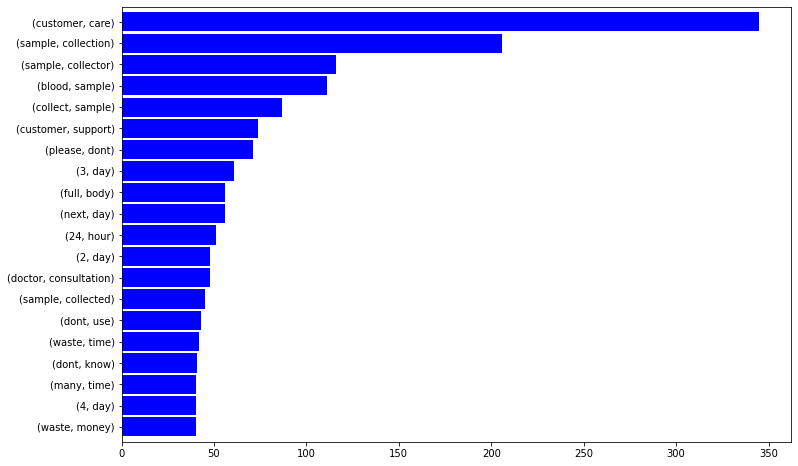

In [ ]:
import matplotlib.pyplot as plt
bigrams_1 = (pd.Series(nltk.ngrams(series_1, 2)).value_counts())[:20]
bigrams_1.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

##Lets try to look at reviews from first theme only?

#Identifying positive themes

####Creating tokenized list of all positive reviews

In [ ]:
Words_2= sorteddata_modified_rating2['content'].tolist()
String_2 = ""
for sent in Words_2:
  String_2= String_2 + sent

series_2 = String_2.split(" ")

#### Themes from Bigrams

In [ ]:
(pd.Series(nltk.ngrams(series_2, 2)).value_counts())[:25]

(sample, collection)      267
(doctor, consultation)     89
(sample, collector)        81
(full, body)               56
(customer, care)           53
(blood, sample)            51
(free, doctor)             49
(sample, collected)        40
(easy, use)                38
(time, sample)             37
(collection, time)         34
(health, checkup)          33
(first, time)              32
(collect, sample)          31
(test, done)               29
(body, checkup)            29
(body, check)              29
(collection, sample)       29
(next, day)                25
(came, time)               25
(free, consultation)       24
(reasonable, price)        24
(user, friendly)           24
(use, app)                 24
(within, 24)               24
dtype: int64

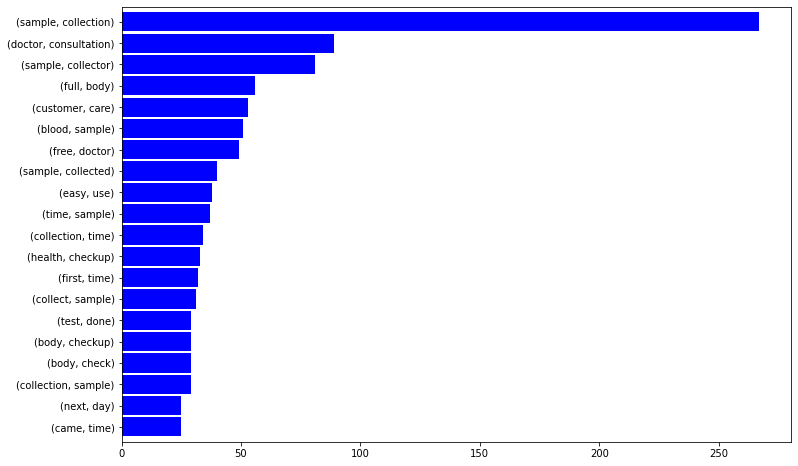

In [ ]:
import matplotlib.pyplot as plt
bigrams_2 = (pd.Series(nltk.ngrams(series_2, 2)).value_counts())[:20]
bigrams_2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

--------------------------------------------------------------------------------


In [ ]:
# library imports
import requests
import time
import pandas as pd
import numpy as np
import ast
import re
from tqdm import tqdm

# preprocessing imports
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# modeling imports
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVR
sid = SentimentIntensityAnalyzer()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')